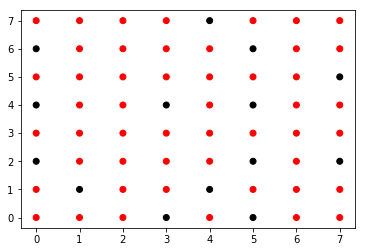

В среднем закрашенных вершин 15.225017749822502


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post=[0]
    for s in range(niter):
        j,i=np.random.choice(8,2)
        proposed = proposal(current)
        p = value(current, **kwargs) / value(proposed, **kwargs)
        if np.random.rand() > p:
            current = proposed
        else:
            current[j][i]=0
        post.append(int(np.sum(current)))
    plot_grid(current.astype('bool'))
    return post[nburn:]

def value(current, **kwargs):
    _ = kwargs
    return np.sum(current)

def proposal(current, **kwargs):
    ind = np.random.choice(8, 2)
    _ = kwargs
    if current[ind[0]][ind[1]] == 1:
        return current
    q = 0
    if ind[0] != 0:
        q = q + current[ind[0] - 1][ind[1]]
        
    if ind[0] != 7:
        q = q + current[ind[0] + 1][ind[1]]
        
    if ind[1] != 0:
        q = q + current[ind[0]][ind[1] - 1]
        
    if ind[1] != 7:
        q = q + current[ind[0]][ind[1] + 1]
    
    if q == 0:
        current[ind[0]][ind[1]] = 1
        
    return current

def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

niter = 100000
start = np.zeros((8, 8))
graph = metropolis(start, value, proposal, niter)
num = sum(graph) / len(graph)
print('В среднем закрашенных вершин', num)

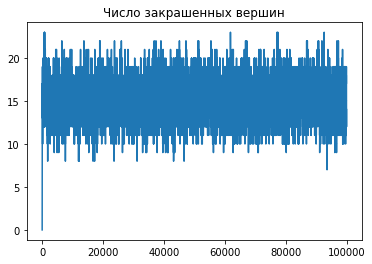

In [18]:
plt.plot(graph)
plt.title("Число закрашенных вершин")
plt.show()

In [19]:
print(g_test(graph[2010:10000]))

print("Подтверждается стационарность")

Ttest_indResult(statistic=-8.181610496992915, pvalue=5.658734824799776e-16)
Подтверждается стационарность


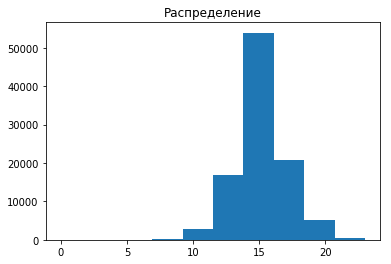

In [20]:
plt.hist(graph)
plt.title("Распределение")
plt.show()